# **DigitalPub Data Viking- Python & Data Analysis** 
Data Vicking** - [https://www.linkedin.com/company/data-viking/)  
Mogakolodi Tlotlang** - [https://www.linkedin.com/in/mogakolodi-tlotlang-007b37231/) 

# **About the dataset** <p>
"Unicorn" is a term used in the venture capital industry to describe a privately held startup worth more than $1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a venture capital fund based in Palo Alto, California.

Unicorns can also refer to a recruitment phenomenon in the human resources (HR) industry. HR managers can have high expectations for filling a role, leading them to look for candidates with higher qualifications than what is required for a specific role. In essence, these managers are looking for a unicorn, which leads to a disconnect between their ideal candidate and who they can hire from the pool of available people.


[Download the database](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


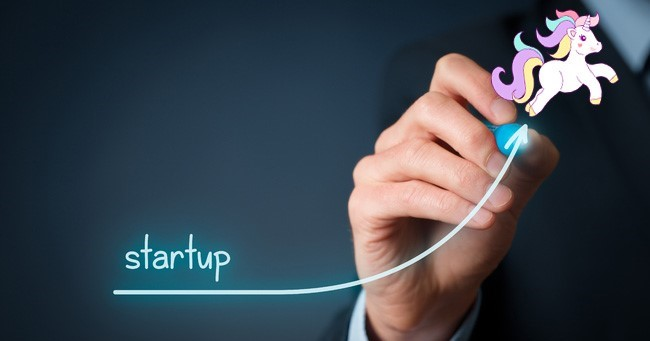

In [47]:
# Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Read the data
Database = pd.read_csv('Startups in 2021 end.csv')

# Check Dimension
Database.shape

(936, 8)

In [49]:
# First Records
Database.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [50]:
# Colums
Database.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [51]:
# Rename
Database.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Company',
    'Valuation ($B)' : 'Value ($)',
    'Date Joined' : 'DateJoined',
    'Country' : 'Country',
    'City' : 'City',
    'Industry': 'Sector',
    'Select Investors': 'Investors',
}, inplace=True )

In [52]:
# Check information datatypes
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          936 non-null    int64 
 1   Company     936 non-null    object
 2   Value ($)   936 non-null    object
 3   DateJoined  936 non-null    object
 4   Country     936 non-null    object
 5   City        921 non-null    object
 6   Sector      936 non-null    object
 7   Investors   935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [53]:
# Null Fields
Database.isnull().sum()

Id             0
Company        0
Value ($)      0
DateJoined     0
Country        0
City          15
Sector         0
Investors      1
dtype: int64

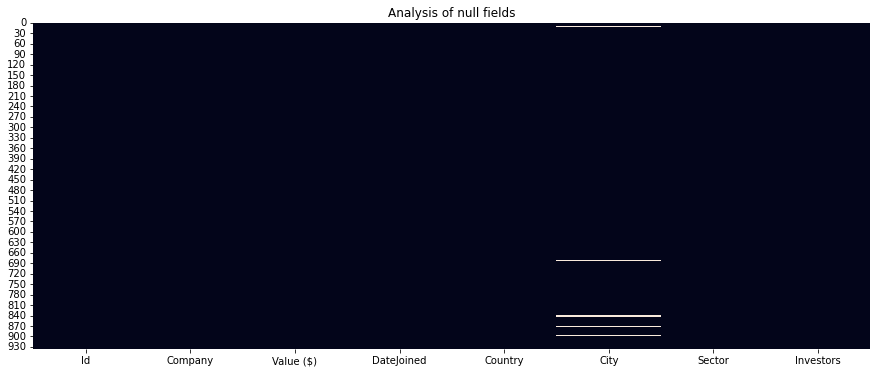

In [54]:
# Graph
plt.figure( figsize=(15,6) )
plt.title('Analysis of null fields')
sns.heatmap( Database.isnull(), cbar=False );

In [55]:
# unique fields
Database.nunique()

Id            936
Company       935
Value ($)     192
DateJoined    589
Country        47
City          239
Sector         17
Investors     920
dtype: int64

In [56]:
# Unique Values
Database['Sector'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [57]:
# Unique Values - Rank
Database['Sector'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Sector, dtype: int64

In [58]:
# Unique Values - Rank
Database['Sector'].value_counts( normalize=True )

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Sector, dtype: float64

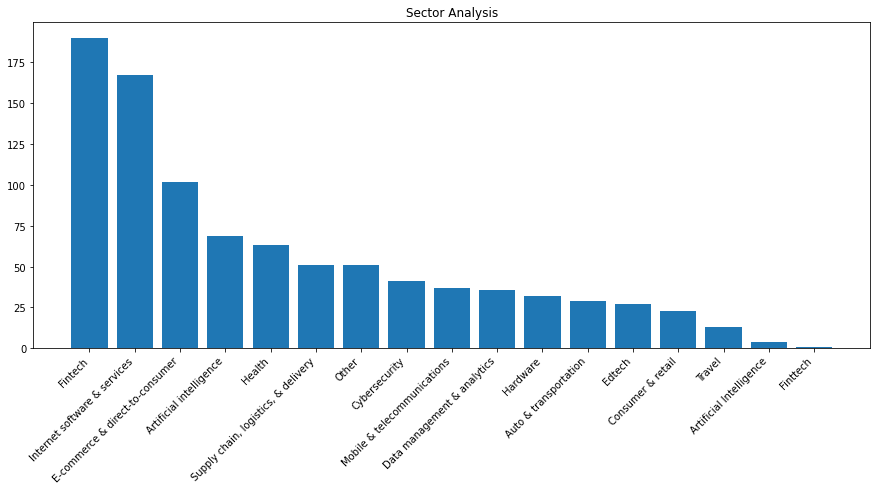

In [59]:
plt.figure( figsize=(15,6) )
plt.title('Sector Analysis')
plt.bar( Database['Sector'].value_counts().index, Database['Sector'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [60]:
Analyse = round( Database['Country'].value_counts( normalize=True ) * 100, 1 )

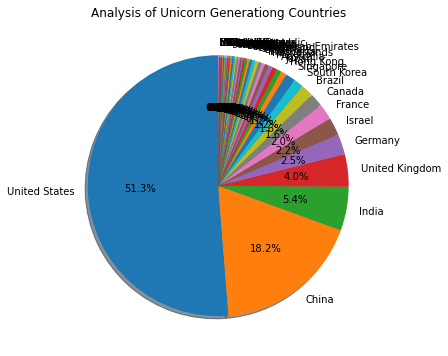

In [61]:
# Country General Plotting
plt.figure( figsize=(15,6) )
plt.title('Analysis of Unicorn Generationg Countries')
plt.pie(
    Analyse,
    labels = Analyse.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

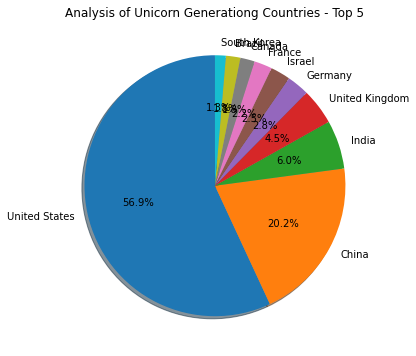

In [63]:
# Country General Plotting
plt.figure( figsize=(15,6) )
plt.title('Analysis of Unicorn Generationg Countries - Top 5')
plt.pie(
    Analyse.head(10),
    labels = Analyse.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [67]:
# Conversion to date
Database['DateJoined'] = pd.to_datetime( Database['DateJoined'] )

Database['DateJoined'].head(10)

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
5   2014-12-30
6   2019-02-05
7   2018-04-26
8   2018-03-01
9   2018-10-26
Name: DateJoined, dtype: datetime64[ns]

In [68]:
# Extract the year and month
Database['Month'] = pd.DatetimeIndex( Database['DateJoined'] ).month
Database['Year'] = pd.DatetimeIndex( Database['DateJoined'] ).year

Database.head()

,Id,Company,Value ($),DateJoined,Country,City,Sector,Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [73]:
# Analytic Table
Analise_GroupedbyCluster = Database.groupby( by=['Country', 'Year', 'Month', 'Company'] ).count()['Id'].reset_index()

Analise_GroupedbyCluster

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [74]:
Analise_GroupedbyCluster.loc[
  Analise_GroupedbyCluster['Country'] == 'Israel'
]

,Country,Year,Month,Company,Id
329,Israel,2016,5,Gett,1
330,Israel,2018,2,OrCam Technologies,1
331,Israel,2019,7,Lightricks,1
332,Israel,2020,1,Moon Active,1
333,Israel,2020,3,InSightec,1
334,Israel,2020,6,Pagaya,1
335,Israel,2020,11,Cato Networks,1
336,Israel,2021,1,DriveNets,1
337,Israel,2021,1,Melio,1
338,Israel,2021,2,Earnix,1


In [76]:
# Transformation of the value column
Database['Value ($)'] = pd.to_numeric( Database['Value ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

Database.head()

,Id,Company,Value ($),DateJoined,Country,City,Sector,Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [78]:
# Analytic Table
Analyse_Country = Database.groupby( by=['Country'] ).sum()['Value ($)'].reset_index()

Analyse_Country.head()

,Country,Value ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [79]:
Analyse_Value = Analyse_Country.sort_values('Value ($)', ascending=False)
Analyse_Value.head()

,Country,Value ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


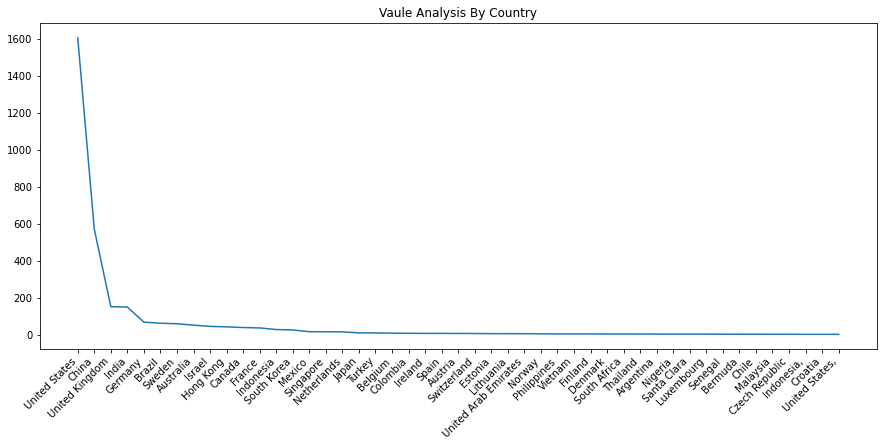

In [80]:
plt.figure( figsize=(15,6) )
plt.plot( Analyse_Value['Country'], Analyse_Value['Value ($)'] )
plt.title('Vaule Analysis By Country')
plt.xticks( rotation=45, ha='right');